# Introduction to SSM Analysis

Reproduced from the introductory vignette for [R Circumplex](https://circumplex.jmgirard.com/articles/introduction-to-ssm-analysis.html), by Girard J, Zimmermann J, Wright A (2023). circumplex: Analysis and Visualization of Circular Data. https://github.com/jmgirard/circumplex, http://circumplex.jmgirard.com/.

If you find this tutorial useful, **please cite Girard, Zimmermann, & Wright (2023)**. I am reproducing it here to demonstrate the equivalence between the R and Python versions of the package. The original R version of this vignette can be found [here](https://circumplex.jmgirard.com/articles/introduction-to-ssm-analysis.html).

In [1]:
import circumplex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
degree_sign = u'\N{DEGREE SIGN}'

## 1. Background and Motivation

### Circumplex models, scales, and data

Circumplex models are popular within many areas of psychology because they offer a parsimonious account of complex psychological domains, such as emotion and interpersonal functioning. This parsimony is achieved by understanding phenomena in a domain as being a "blend" of two primary dimensions. For instance, circumplex models of emotion typically represent affective phenomena as a blend of *valence* (pleasantness versus unpleasantness) and *arousal* (activity versus passivity), whereas circumplex models of interpersonal functioning typically represent interpersonal phenomena as a blend of *communion* (affiliation versus separation) and *agency* (dominance versus submissiveness). These models are often depicted as circles around the intersection of the two dimensions (see figure). Any given phenomenon can be located within this circular space through reference to the two underlying dimensions (e.g. anger is a blend of unpleasantness and activity).

Circumplex scales contain multiple subscales that attempt to measure different blends of the two primary dimensions (i.e., different parts of the circle). Although there have historically been circumplex scales with as many as sixteen subscales, it has become most common to use eight subscales: one for each “pole” of the two primary dimensions and one for each “quadrant” that combines the two dimensions. In order for a set of subscales to be considered circumplex, they must exhibit certain properties. Circumplex fit analyses can be used to quantify these properties.

Circumplex data is composed of scores on a set of circumplex scales for one or more participants (e.g., persons or organizations). Such data is usually collected via self-report, informant-report, or observational ratings in order to locate psychological phenomena within the circular space of the circumplex model. For example, a therapist might want to understand the interpersonal problems encountered by an individual patient, a social psychologist might want to understand the emotional experiences of a group of participants during an experiment, and a personality psychologist might want to understand what kind of interpersonal behaviors are associated with a trait (e.g., extraversion). 



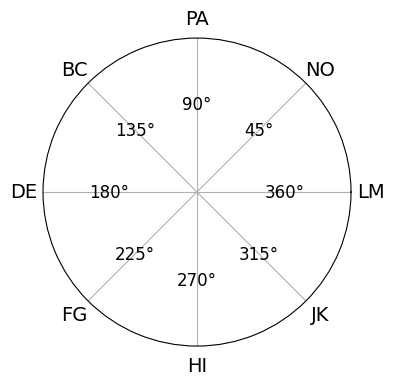

In [22]:
angles = (90, 135, 180, 225, 270, 315, 360, 45)
alabel = ("PA", "BC", "DE", "FG", "HI", "JK", "LM", "NO")

# Create plot ---------------------------------------------------------------

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

ax.plot()
ax.set_xticks(np.radians(angles), labels=alabel, fontsize=14)
ax.set_yticks([])
ax.grid(True)
for i, angle in enumerate(angles):
    ax.text(
        np.radians(angle),
        0.6,
        f"{angle}{degree_sign}",
        ha="center",
        va="center",
        fontsize=12,
)
plt.show()

### The Structural Summary Method

The Structural Summary Method (SSM) is a technique for analyzing circumplex data that offers practical and interpretive benefits over alternative techniques. It consists of fitting a cosine curve to the data, which captures the pattern of correlations among scores associated with a circumplex scale (i.e., mean scores on circumplex scales or correlations between circumplex scales and an external measure). By plotting a set of example scores below, we can gain a visual intuition that a cosine curve makes sense in this case. First, we can examine the scores with a bar chart ignoring the circular relationship among them.

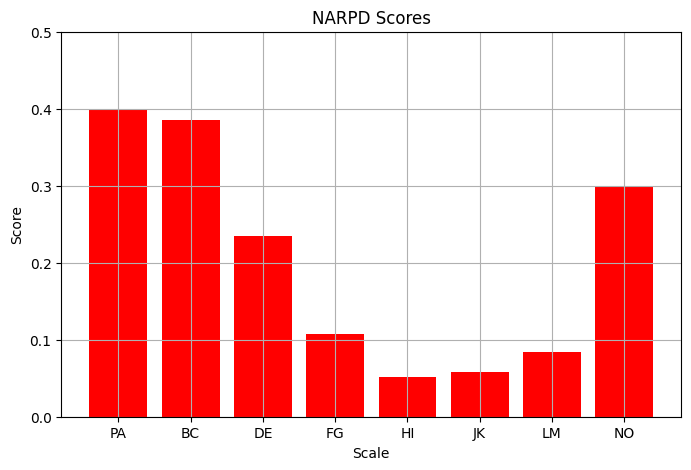

In [23]:
from circumplex.datasets import JZ2017
import matplotlib.pyplot as plt

jz_data = JZ2017
r = jz_data.ssm_analyse(measures = ["NARPD"])
plt.figure(figsize=(8, 5))
plt.bar(r.results[0].scores.index, r.results[0].scores.values, color='red')
plt.ylim(0, 0.5)
plt.ylabel("Score")
plt.xlabel("Scale")
plt.title("NARPD Scores")
plt.grid(True)
plt.show()

Next, we can leverage the fact that these subscales have specific angular displacements in the circumplex model (and that 0 and 360 degrees are the same) to create a path diagram.


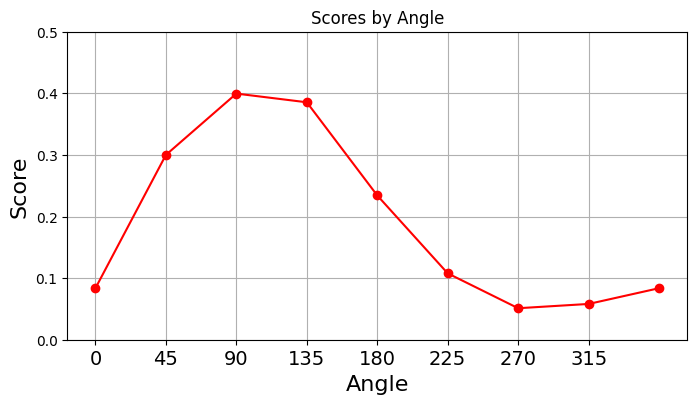

In [24]:
fig, ax = circumplex.profile_plot(r.results[0].amplitude, r.results[0].displacement, r.results[0].elevation, r.results[0].r2, r.results[0].angles, r.results[0].scores, r.results[0].label, incl_amp=False, incl_disp=False, incl_pred=False, incl_fit=False, reorder_scales=True);

ax.grid(True)
plt.ylim(0, 0.5)
plt.xlabel("Angle")
plt.title("Scores by Angle")
plt.show()

This already looks like a cosine curve, and we can finally use the SSM to estimate the parameters of the curve that best fits the observed data. By plotting it alongside the data, we can get a sense of how well the model fits our example data.

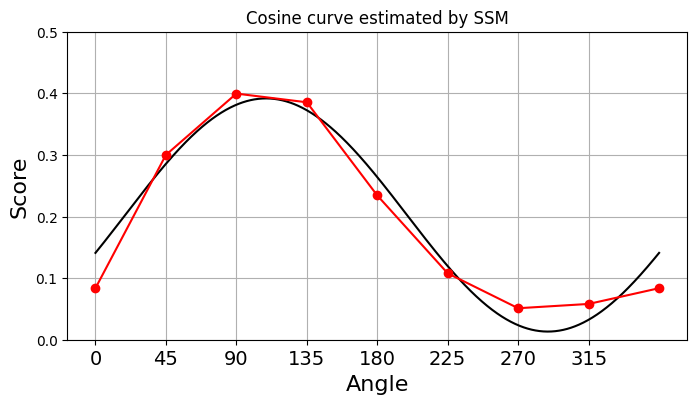

In [25]:
fig, ax = r.results[0].profile_plot(reorder_scales=True, incl_amp=False, incl_disp=False, incl_pred=True, incl_fit=False);
ax.grid(True)
plt.ylim(0, 0.5)
plt.xlabel("Angle")
plt.title("Cosine curve estimated by SSM")
plt.show()


## Understanding the SSM Parameters

The SSM estimates a cosine curve to the data using the following equation:

$$
S_i = e + a \times \cos(\theta_i - d)
$$

where $S_i$ and $\theta_i$ are the score and angle on scale $i$, respectively, and $e$, $a$, and $d$ are the elevation, amplitude, and displacement of the curve, respectively. Before we discuss these parameters, however, we can also estimate the fit of the SSM model. This is essentially how close the cosine curve is to the observed data points.

## Example Data: jz2017

To illustrate the SSM functions, we will use the example dataset `JZ2017`, which was provided by Zimmerman & Wright (2017). This dataset includes self-report data from 1166 undergraduate students. Students completed a circumplex measure of interpersonal problems with eight subscales (PA, BC, DE, FG, HI, JK, LM, and NO) and a measure of personality disorder symptoms with ten subscales (PARPD, SCZPD, SZTPD, ASPD, BORPD, HISPD, NARPD, AVPD, DPNPD, and OCPD). More information about these variables can be accessed by looking at the summary of the dataset with `jz_data.summary()`:

In [27]:
from circumplex.datasets import JZ2017
jz_data = JZ2017

print(jz_data.summary())

CSIP: Circumplex Scales of Interpersonal Problems
64 Items, 8 Scales
Boudreaux, Ozer, Oltmanns, & Wright (2018)
<https://doi.org/10.1037/pas0000505>

The CSIP contains 8 circumplex scales.
PA: Domineering (90°)
BC: Self-Centered (135°)
DE: Distant (180°)
FG: Socially Inhibited (225°)
HI: Nonassertive (270°)
JK: Exploitable (315°)
LM: Self-Sacrificing (360°)
NO: Intrusive (45°)

The CSIP is rated using the following 4-point scale.
0. Not a problem
1. Minor problem
2. Moderate problem
3. Serious problem

The CSIP contains 64 items (open-access).
None
None


And we can view the accompanying dataset with:

In [28]:
jz_data.data.head()


,Gender,PA,BC,DE,FG,HI,JK,LM,NO,PARPD,SCZPD,SZTPD,ASPD,BORPD,HISPD,NARPD,AVPD,DPNPD,OCPD
0,Female,1.50,1.50,1.25,1.00,2.00,2.50,2.25,2.50,4,3,7,7,8,4,6,3,4,6
1,Female,0.00,0.25,0.00,0.25,1.25,1.75,2.25,2.25,1,0,2,0,1,2,3,0,1,0
2,Female,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,4,1,5,4,0,0,1
3,Male,2.00,1.75,1.75,2.50,2.00,1.75,2.00,2.50,1,0,0,0,1,0,0,0,0,0
4,Female,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,1,0,0


The circumplex scales in `JZ2017` come from the Inventory of Interpersonal Problems - Short Circumplex (IIP-SC). These scales can be arranged into the following circular model, which is organized around the two primary dimensions of agency (y-axis) and communion (x-axis). Note that the two-letter scale abbreviations and angular values are based on convention. A high shore on PA indicates that one has interpersonal problems related to being "domineering" or too high on agency, whereas a high score on DE indicates problems related to being "cold" or too low on communion. Scales that are not directly on the y-axis or x-axis (i.e. BC, FG, JK, and NO) represent blends of agency and communion. 

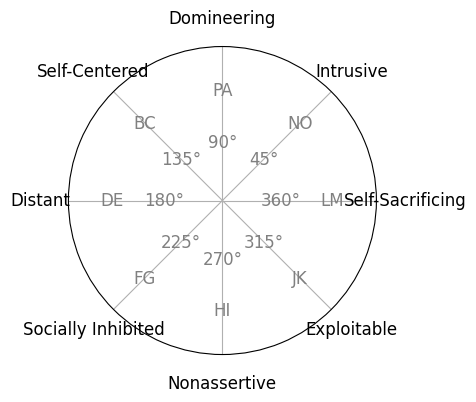

In [29]:
jz_data.demo_plot()

## Mean-based SSM Analysis

### Conducting SSM for a group's mean scores

To begin, [...]